### Ce notebook permet de faire de la reconaissnace de chiffre écrit à la main en utilisant un réseau de neurones convolutif. 


#### import : 

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Chargement des données MNIST

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalisation des données pour faciliter l'apprentissage du réseau : 

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Création d'un modèle simple de réseau de neurones multicouches (4 couches)

In [17]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

C:\Users\pierr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Création d'un modèle simple de réseau de neurones multicouches avec convolution (4 couches)

In [18]:
model_conv = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\pierr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilation des modèles

In [19]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model_conv.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


Vérification des modèles

In [20]:
model.summary()

model_conv.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement des modèles

In [21]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

history_conv = model_conv.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8537 - loss: 0.5015 - val_accuracy: 0.9662 - val_loss: 0.1215
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9531 - loss: 0.1600 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9651 - loss: 0.1144 - val_accuracy: 0.9775 - val_loss: 0.0791
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9723 - loss: 0.0901 - val_accuracy: 0.9780 - val_loss: 0.0803
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0733 - val_accuracy: 0.9785 - val_loss: 0.0778
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8973 - loss: 0.3469 - val_accuracy: 0.9855 - val_loss: 0.0470
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9837 - loss: 0.0514 - val_accuracy: 0.9860 - val_loss: 0.0531
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9891 - loss: 0.0341 - val_accu

Évaluation des modèles

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

test_loss_conv, test_acc_conv = model_conv.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print('Test accuracy:', test_acc_conv)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9718 - loss: 0.0908
Test accuracy: 0.9758999943733215
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.0404
Test accuracy: 0.9897000193595886


Afficher les performances des modèles

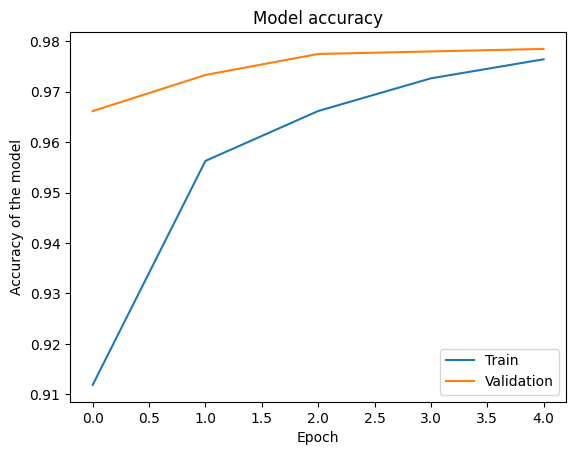

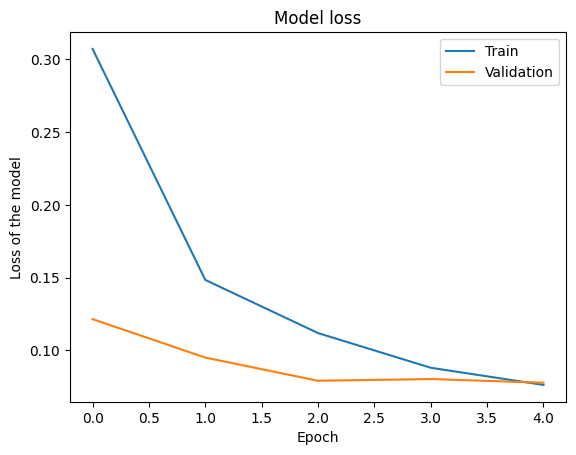

Ajoutons la convolution : 


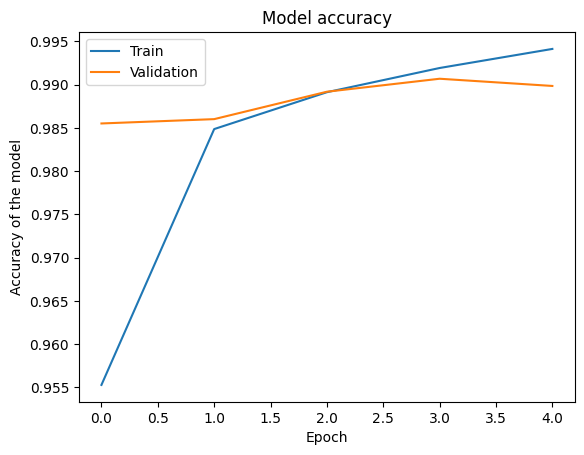

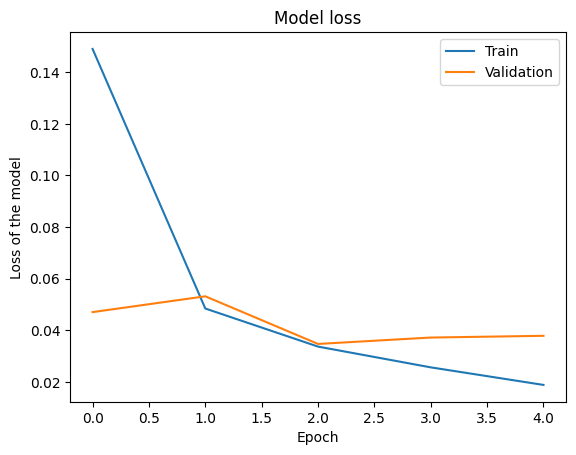

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

print("Ajoutons la convolution : ")

plt.plot(history_conv.history['accuracy'])
plt.plot(history_conv.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Évaluer les modèles

In [24]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

scores_conv = model_conv.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print("Accuracy: %.2f%%" % (scores_conv[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9718 - loss: 0.0908
Accuracy: 97.59%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.0404
Accuracy: 98.97%


Prédiction et visualisation des résultats

In [25]:
predictions = model.predict(x_test[:5])

print("Avec convolution")

predictions_conv = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Avec convolution
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


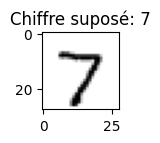

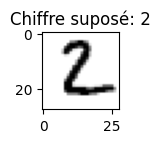

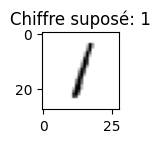

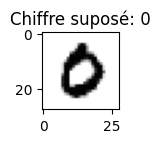

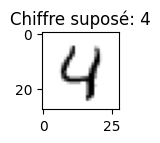

Avec convolution


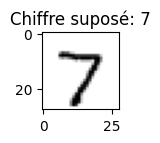

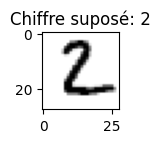

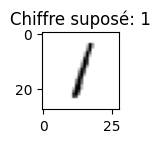

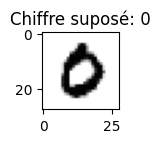

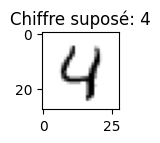

In [26]:
for i, prediction in enumerate(predictions):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()

print("Avec convolution")

for i, prediction in enumerate(predictions_conv):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()

test des codes avec des images faites à la main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


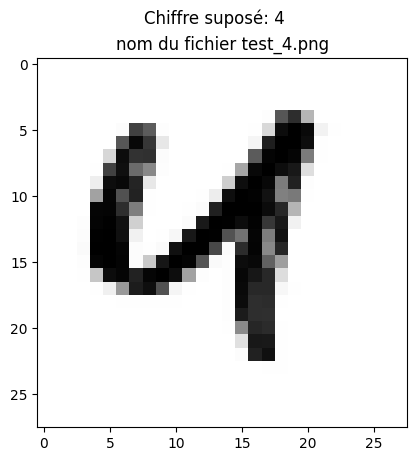

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


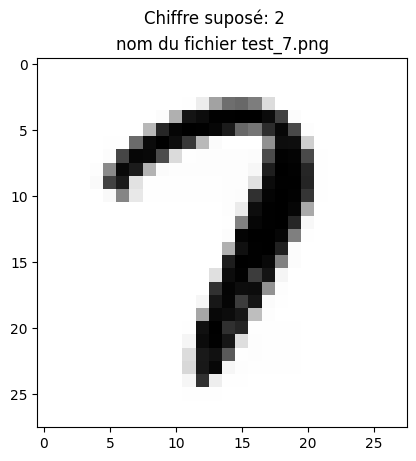

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


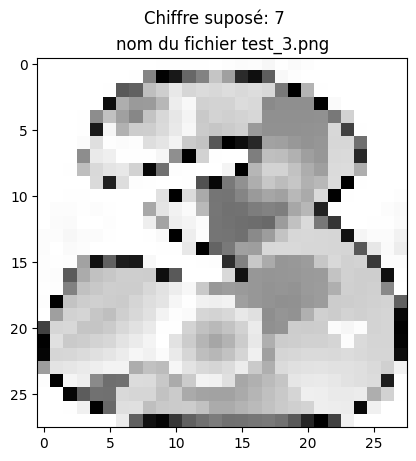

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


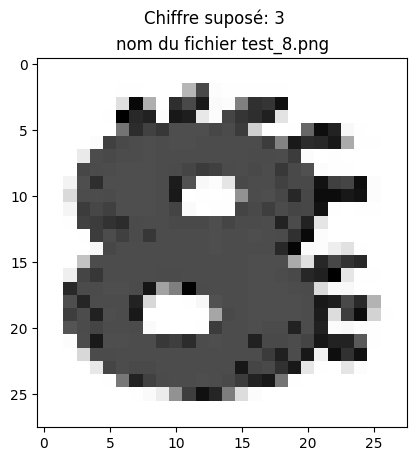

Avec convolution
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


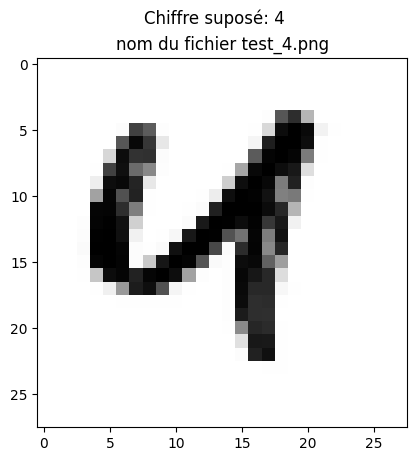

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


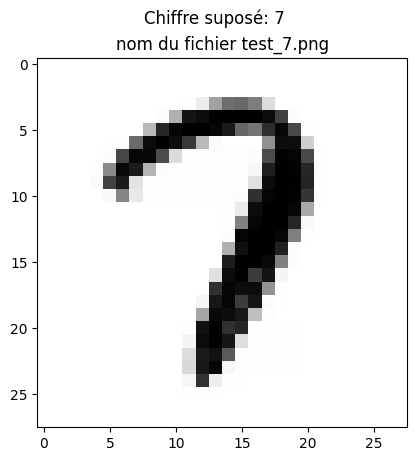

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


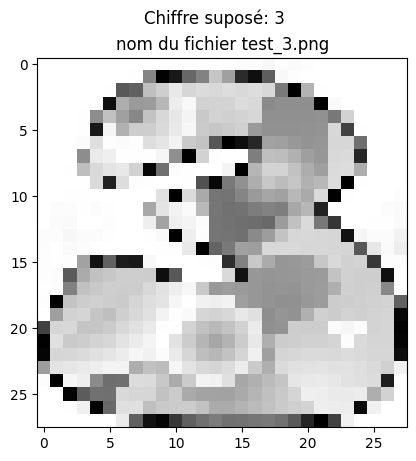

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


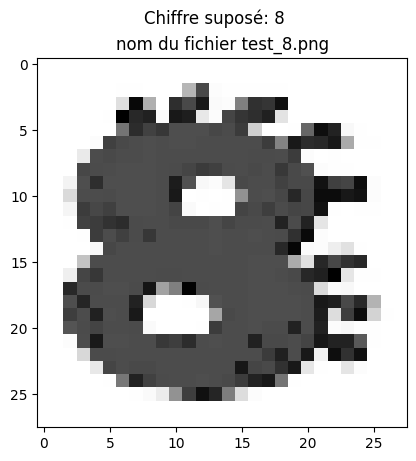

In [27]:
import cv2
import numpy as np

files_name = ['test_4.png', 'test_7.png', 'test_3.png','test_8.png']

for file_name in files_name:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28)

    prediction = model.predict(img)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.suptitle(f"Chiffre suposé: {prediction.argmax()}")
    plt.title("nom du fichier " + file_name)
    plt.show()

print("Avec convolution")

for file_name in files_name:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)

    prediction = model_conv.predict(img)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.suptitle(f"Chiffre suposé: {prediction.argmax()}")
    plt.title("nom du fichier " + file_name)
    plt.show()